In [1]:
import pandas as pd

In [2]:
hyung = pd.read_csv('./수집한 데이터들/면접왕이형/data.csv',engine='python',encoding='euc-kr')
hyung.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
hyung.head()

,title,run_time,date,view
0,상반기를 이렇게 준비하면 당연히 떨어집니다,7:51,2022. 2. 17.,"조회수 26,080회"
1,2월에 진짜 놓치면 안 되는 것,8:36,2022. 2. 15.,"조회수 55,310회"
2,서류에서 매번 광탈하는 취준생 특징,1:11:05,실시간 스트리밍 시작일: 2022. 2. 14.,"조회수 13,909회"
3,"공백기 2년, 스펙 부족 지원자에 대한 면접관의 속마음",9:43,2022. 2. 13.,"조회수 32,281회"
4,나도 모르게 취업이 안 되는 이유,7:17,2022. 2. 9.,"조회수 16,045회"


# 1. 전처리
## 1) 날짜 전처리

#### '실시간 스트리밍 시작일', '최초 공개' 삭제

In [4]:
for i in range(len(hyung)):
    if '실시간 스트리밍 시작일: ' in hyung['date'][i]:
        hyung['date'][i] = hyung['date'][i][14:]
    if '최초 공' in hyung['date'][i]:
        hyung['date'][i] = hyung['date'][i][7:]

#### 날짜 이어붙이기

In [5]:
for i in range(len(hyung)):
    hyung['date'][i] = hyung['date'][i][:-1]
    hyung['date'][i] = hyung['date'][i].split('. ')
    if len(hyung['date'][i][1]) == 1:
        hyung['date'][i][1] = '0' + hyung['date'][i][1]
    if len(hyung['date'][i][2]) == 1:
        hyung['date'][i][2] = '0' + hyung['date'][i][2]
    hyung['date'][i] = int(hyung['date'][i][0]+hyung['date'][i][1]+hyung['date'][i][2])    

In [6]:
hyung.head()

,title,run_time,date,view
0,상반기를 이렇게 준비하면 당연히 떨어집니다,7:51,20220217,"조회수 26,080회"
1,2월에 진짜 놓치면 안 되는 것,8:36,20220215,"조회수 55,310회"
2,서류에서 매번 광탈하는 취준생 특징,1:11:05,20220214,"조회수 13,909회"
3,"공백기 2년, 스펙 부족 지원자에 대한 면접관의 속마음",9:43,20220213,"조회수 32,281회"
4,나도 모르게 취업이 안 되는 이유,7:17,20220209,"조회수 16,045회"


#### 년 월 일 따로 분리 (year, month, day column으로)

year = []
month = []
day = []
for i in range(len(hyung)):
    year.append(hyung['date'][i][:4])
    
    # 각 날짜에 따라 슬라이스하는 위치가 달라짐
    # 00월 00일
    if len(hyung['date'][i]) == 11:
        month.append(hyung['date'][i][6:7])
        day.append(hyung['date'][i][9:10])
    # 00월 0일 or 0월 00일
    elif len(hyung['date'][i]) == 12:
        if hyung['date'][i][7] == '.':
            month.append(hyung['date'][i][6])
            day.append(hyung['date'][i][9:11])
        elif hyung['date'][i][8] == '.':
            month.append(hyung['date'][i][6:8])
            day.append(hyung['date'][i][10:11])
    # 0월 0일
    else:
        month.append(hyung['date'][i][6:8])
        day.append(hyung['date'][i][10:12])

hyung['year'] = year
hyung['month'] = month
hyung['day'] = day

hyung.head()

## 2) 조회수 전처리

#### 숫자만 남기기

In [7]:
for i in range(len(hyung)):
    hyung['view'][i] = hyung['view'][i][4:-1]
    if ',' in hyung['view'][i]:
        hyung['view'][i] = hyung['view'][i].replace(',','')

hyung.head()

,title,run_time,date,view
0,상반기를 이렇게 준비하면 당연히 떨어집니다,7:51,20220217,26080
1,2월에 진짜 놓치면 안 되는 것,8:36,20220215,55310
2,서류에서 매번 광탈하는 취준생 특징,1:11:05,20220214,13909
3,"공백기 2년, 스펙 부족 지원자에 대한 면접관의 속마음",9:43,20220213,32281
4,나도 모르게 취업이 안 되는 이유,7:17,20220209,16045


#### int형으로 형변환

In [8]:
hyung['view'] = hyung['view'].astype(int)

## 3) 영상 길이 전처리

In [9]:
for i in range(len(hyung)):
    hyung['run_time'][i] = hyung['run_time'][i].split(':')
hyung

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,run_time,date,view
0,상반기를 이렇게 준비하면 당연히 떨어집니다,"[7, 51]",20220217,26080
1,2월에 진짜 놓치면 안 되는 것,"[8, 36]",20220215,55310
2,서류에서 매번 광탈하는 취준생 특징,"[1, 11, 05]",20220214,13909
3,"공백기 2년, 스펙 부족 지원자에 대한 면접관의 속마음","[9, 43]",20220213,32281
4,나도 모르게 취업이 안 되는 이유,"[7, 17]",20220209,16045
...,...,...,...,...
410,진짜 잘 본 면접: 면접 잘 본거 같아요? 그 기준이 뭘까요?,"[7, 37]",20181205,223441
411,"면접관이 원하는, 두괄식 답변을 알려주마! (말을 짧게 하는게 두괄식이 아니야...)","[4, 36]",20181205,221963
412,"면접관이 밝히는, 면접준비의 핵심 - 수비형면접을 벗어나라","[6, 59]",20181205,97103
413,면접 마인드셋: 성공하는 면접은 시작이 다르다!,"[2, 58]",20181205,41178


#### 분, 초로 분해

hour = []
minute = []
second = []

for i in range(len(hyung)):
    # ':'를 기준으로 시, 분, 초 분해
    split = hyung['run_time'][i].split(':')
    
    # 영상 길이가 초
    if len(split) == 1:
        hour.append(0)
        minute.append(0)
        second.append(split[0])
        
    # 영상 길이가 분
    elif len(split) == 2:
        hour.append(0)
        minute.append(split[0])
        second.append(split[1])
        
    # 영상 길이가 시
    else:
        hour.append(split[0])
        minute.append(split[1])
        second.append(split[2])


hyung['hour'] = hour
hyung['minute'] = minute
hyung['second'] = second

#### 한자리수인 초가 두자리로 되어있음. 한자리로 바꾸기

for i in range(len(hyung)):
    if hyung['second'][i][0] == '0':
        hyung['second'][i] = hyung['second'][i][1:]
hyung

# 2. 분석
## 1) 영상 길이와 조회수간의 관계
### 1-1) shorts에 따라 조회수 차이가 많이 날까?
- shorts란? 최대 60초 길이의 짧은 동영상

In [10]:
for i in range(len(hyung)):
    if 'Shorts' in hyung['title'][i]:
        print(hyung.index[i])

7
12


In [11]:
# shorts 영상
shorts = hyung.iloc[[7, 12]]

#shorts가 아닌 영상
except_shorts = hyung.drop([7, 12], axis = 0)

In [12]:
print(except_shorts['view'].mean(), shorts['view'].mean())

96792.84745762713 1078769.5


- short vs shortX 조회수 비교 시각화

In [13]:
import matplotlib.pyplot as plt
import numpy as np

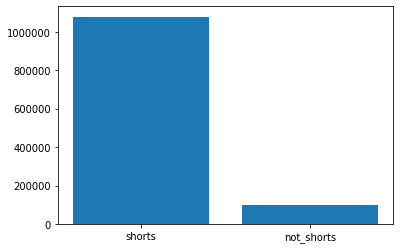

In [14]:
x = np.arange(2)
types = ['shorts', 'not_shorts']
values = [shorts['view'].mean(), except_shorts['view'].mean()]

plt.bar(x, values)
plt.xticks(x, types)

plt.show()

In [15]:
shorts['view'].mean() / except_shorts['view'].mean()

11.145136529558668

**shorts 영상이 아닌 영상에 비해 조회수가 약 11배 높다**

### 1-2) 영상 길이와 조회수 비교

In [42]:
except_shorts.head()

,title,run_time,date,view
0,상반기를 이렇게 준비하면 당연히 떨어집니다,471,20220217,26080
1,2월에 진짜 놓치면 안 되는 것,516,20220215,55310
2,서류에서 매번 광탈하는 취준생 특징,4265,20220214,13909
3,"공백기 2년, 스펙 부족 지원자에 대한 면접관의 속마음",583,20220213,32281
4,나도 모르게 취업이 안 되는 이유,437,20220209,16045


In [43]:
# except_shorts 데이터프레임 index 초기화
except_shorts.reset_index(drop = True, inplace = True)

# run_time str을 int로 형변환
for i in range(len(except_shorts)):
    for j in range(len(except_shorts['run_time'][i])):
        except_shorts['run_time'][i][j] = int(except_shorts['run_time'][i][j])

# run_time 초로 변환
run_time_second = []

for i in range(len(except_shorts)):
    if len(except_shorts['run_time'][i]) == 2:
        run_time_second.append(except_shorts['run_time'][i][0]*60 + except_shorts['run_time'][i][1])
    else:
        run_time_second.append(except_shorts['run_time'][i][0]*60*60 + except_shorts['run_time'][i][1]*60 + except_shorts['run_time'][i][2])

except_shorts['run_time'] = run_time_second
except_shorts.sort_values(by = 'view', ascending = False)

TypeError: object of type 'numpy.int64' has no len()

In [21]:
# seaborn 한글 깨짐 해결

import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic")

In [56]:
except_shorts

,title,run_time,date,view
0,상반기를 이렇게 준비하면 당연히 떨어집니다,471,20220217,26080
1,2월에 진짜 놓치면 안 되는 것,516,20220215,55310
2,서류에서 매번 광탈하는 취준생 특징,4265,20220214,13909
3,"공백기 2년, 스펙 부족 지원자에 대한 면접관의 속마음",583,20220213,32281
4,나도 모르게 취업이 안 되는 이유,437,20220209,16045
...,...,...,...,...
408,진짜 잘 본 면접: 면접 잘 본거 같아요? 그 기준이 뭘까요?,457,20181205,223441
409,"면접관이 원하는, 두괄식 답변을 알려주마! (말을 짧게 하는게 두괄식이 아니야...)",276,20181205,221963
410,"면접관이 밝히는, 면접준비의 핵심 - 수비형면접을 벗어나라",419,20181205,97103
411,면접 마인드셋: 성공하는 면접은 시작이 다르다!,178,20181205,41178


Text(0.5, 1.0, '길이별 조회수')

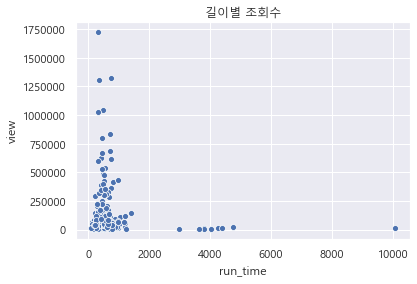

In [57]:
sns.scatterplot(x='run_time', y='view', data = except_shorts)
plt.title('길이별 조회수')

Text(0.5, 1.0, '길이가 20분 이하인 영상의 조회수')

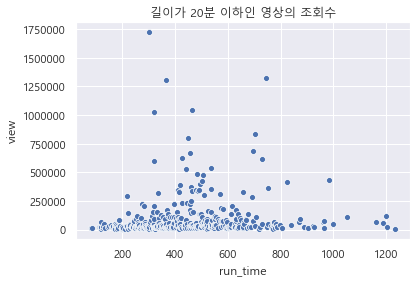

In [46]:
sns.scatterplot(x='run_time', y='view', data = except_shorts.sort_values(by = 'run_time')[:-11])
plt.title('길이가 20분 이하인 영상의 조회수')

**영상 길이와 조회수는 연관이 없다. 하지만 영상이 20분 이상 길어지면 조회수가 낮게 나온다.
5분 ~ 13분대에 조회수가 가장 높다**

---

## 2) 제목 키워드와 조회수간의 관계

In [61]:
except_shorts.sort_values(by='view', ascending = False).head()

,title,run_time,date,view
403,"면접관이 밝히는, 1분 자기소개는 이렇게 해야 들린다! 정말 자기소개는 안들려요~",302,20181209,1727000
196,준비 안하면 면접 광탈하는 질문 5개,743,20200611,1324995
142,면접관이 직접 보여주는 우리회사 떨어지면 어디 갈 거예요? 면접답변,367,20201119,1302687
167,면접관이 5초만 봐도 합격시키고 싶은 자소서 작성법 3가지,466,20200827,1045642
404,"면접관이 밝히는, 마지막할말은... 아무말도 하지 말아줘! 나 힘들다고~",320,20181208,1025777


### 2-1) 1분 자기소개 영상이 가장 높음 (이상치)

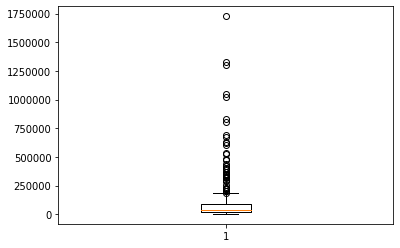

In [18]:
fig, ax = plt.subplots()

ax.boxplot(except_shorts['view'])

plt.show()

In [19]:
except_shorts[except_shorts['view'] == max(except_shorts['view'])]

,title,run_time,date,view
403,"면접관이 밝히는, 1분 자기소개는 이렇게 해야 들린다! 정말 자기소개는 안들려요~",302,20181209,1727000


- 1분 자기소개 영상은 여러개인데 왜 저것만 높을까?

In [20]:
oneminute = []
oneminute_sum = 0
for i in range(len(except_shorts)):
    if '1분' in except_shorts['title'][i]:
        oneminute.append(except_shorts.iloc[i][['title','view', 'run_time']])
        oneminute_sum += 1
oneminute = pd.DataFrame(oneminute)
print('영상 개수:', oneminute_sum,'개')

영상 개수: 18 개


Text(0.5, 1.0, '영상 길이 별 1분 자기소개 영상 조회수')

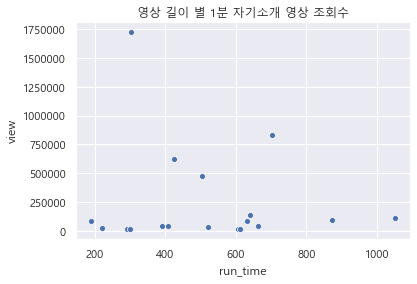

In [22]:
sns.scatterplot(x='run_time', y='view', data=oneminute)
plt.title('영상 길이 별 1분 자기소개 영상 조회수')

- 영상 길이가 짧으니까 조회수가 높네. 전체 영상도 길이가 짧아야 조회수가 잘나오나? -> 아님

Text(0.5, 1.0, '20분 이하 영상의 조회수')

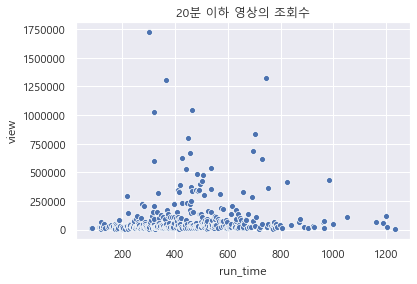

In [23]:
sns.scatterplot(x='run_time', y='view', data = except_shorts.sort_values(by = 'run_time')[:-11])
plt.title('20분 이하 영상의 조회수')

- 오래된 영상이라 누적 조회수가 높게 나온건가? -> 살짝 가능성 있음

In [51]:
oneminute['date'] = except_shorts['date']
oneminute

,title,view,run_time,date
43,1분자기소개 후에 이 질문 받으면 합격입니다,139148,640,20211104
46,면접관이 1분자기소개를 시키는 이유의 모든것 (신입부터 경력까지),107842,1052,20211018
95,불합격/합격 예시로 보여주는 1분 자기소개 (feat. 사례있음),90184,874,20210511
112,[면접연구소] 직접 보여주는 1분 자기소개 핵심 요약,83383,189,20210330
140,면접관이 듣기만해도 불합격시키고 싶은 1분 자기소개,832956,704,20201124
151,면접관이 직접 밝히는 1분자기소개 오해 3가지,88841,631,20201022
156,면접관이 직접 보여주는 합격하는 1분 자기소개,625391,425,20201007
188,"면접관이 답답해서 밝히는, 합격하는 1분 자기소개! 꼭 안보고 떨어지더라...",473501,505,20200630
262,당신의 1분자기소개에 면접관이 눈길을 주지 않는 이유,40500,407,20191024
263,면접평가표에서 1분 자기소개는 얼마나 영향을 미칠까? (feat. 면접전략의 중요성),27841,220,20191021


Text(0.5, 1.0, '날짜별 1분 자기소개서 조회수')

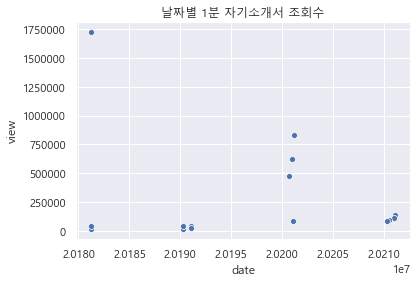

In [26]:
sns.scatterplot(x='date', y='view', data = oneminute)
plt.title('날짜별 1분 자기소개서 조회수')

Text(0.5, 1.0, '날짜별 조회수')

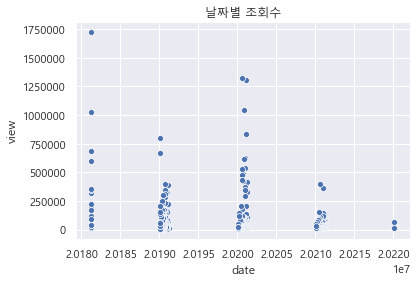

In [63]:
sns.scatterplot(x='date', y='view', data = except_shorts)
plt.title('날짜별 조회수')

**영상 하나가 172만뷰로 유난히 높다**
- **회색 썸네일**
- 시간이 갈 수록 조회수가 줄어듦

### 연도별 영상수 대비 조회수

In [81]:
sum_2018, sum_2019, sum_2020, sum_2021 = 0,0,0,0
view_2018, view_2019, view_2020, view_2021 = 0,0,0,0

for i in range(len(except_shorts)):
    if except_shorts['date'][i]//10000 == 2018:
        view_2018 += except_shorts['view'][i]
        sum_2018 += 1
    elif except_shorts['date'][i]//10000 == 2019:
        view_2019 += except_shorts['view'][i]
        sum_2019 += 1
    elif except_shorts['date'][i]//10000 == 2020:
        view_2020 += except_shorts['view'][i]
        sum_2020 += 1
    elif except_shorts['date'][i]//10000 == 2021:
        view_2021 += except_shorts['view'][i]
        sum_2021 += 1
print(int(view_2018/sum_2018), int(view_2019/sum_2019), int(view_2020/sum_2020), int(view_2021/sum_2021))

216171 87990 132912 46466


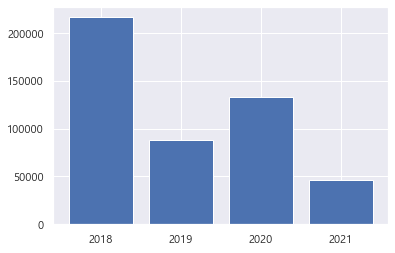

In [82]:
x = np.arange(4)
types = ['2018', '2019', '2020', '2021']
values = [int(view_2018/sum_2018), int(view_2019/sum_2019),  int(view_2020/sum_2020), int(view_2021/sum_2021)]

plt.bar(x, values)
plt.xticks(x, types)

plt.show()

- 시간이 갈수록 조회수가 줄어든다
- 2020년에는 조회수가 왜 갑자기 늘었을까?

### 2020년 영상 분석

In [84]:
df_2020 = except_shorts[except_shorts['date']//10000 == 2020]

In [85]:
df_2020

,title,run_time,date,view
131,선택하면 안되는 계약직ㅣ계약직 고르는 기준 3가지,557,20201228,111846
132,중소기업을 고르는 기준 3가지,824,20201221,417890
133,면접관이 뽑을 수밖에 없는 경험,462,20201216,39404
134,비시즌 취준생이 반드시 체크해야하는 3가지,624,20201210,23749
135,2020년 취업준비 이대로 괜찮은가 고민이라면 꼭 보세요,723,20201208,24759


---

---

- 조회수 상위 10개

In [27]:
except_shorts.sort_values(by = 'view', ascending = False)[:10]

,title,run_time,date,view
403,"면접관이 밝히는, 1분 자기소개는 이렇게 해야 들린다! 정말 자기소개는 안들려요~",302,20181209,1727000
196,준비 안하면 면접 광탈하는 질문 5개,743,20200611,1324995
142,면접관이 직접 보여주는 우리회사 떨어지면 어디 갈 거예요? 면접답변,367,20201119,1302687
167,면접관이 5초만 봐도 합격시키고 싶은 자소서 작성법 3가지,466,20200827,1045642
404,"면접관이 밝히는, 마지막할말은... 아무말도 하지 말아줘! 나 힘들다고~",320,20181208,1025777
140,면접관이 듣기만해도 불합격시키고 싶은 1분 자기소개,704,20201124,832956
367,"면접관이 들어본 최고의 답변, 퇴직사유 뭐라고 하지?",449,20190125,801307
397,면접관이 밝힌다! 임원면접관도 반하는 입사후 포부!,697,20181215,689925
372,"면접관이 알려주는 ""상사가 부당한 업무를 지시한다면?""질문의도!",456,20190117,671097
156,면접관이 직접 보여주는 합격하는 1분 자기소개,425,20201007,625391


1. 조회수 상위 10개 중 1분 자기소개 3개 포함됨

In [28]:
oneminute = []
oneminute_sum = 0
for i in range(len(except_shorts)):
    if '1분' in except_shorts['title'][i]:
        oneminute.append(except_shorts.iloc[i][['title','view', 'run_time']])
        oneminute_sum += 1
oneminute = pd.DataFrame(oneminute)
print('영상 개수:', oneminute_sum,'개, 1분 자기소개 평균 조회수', round(oneminute['view'].mean(),2), '영상 평균 조회수 :', round(except_shorts['view'].mean(),2))


영상 개수: 18 개, 1분 자기소개 평균 조회수 246293.56 영상 평균 조회수 : 96792.85


2. 이형이 직접 보여주는 영상 (시뮬레이션 영상)이 2개 포함됨

In [29]:
simulation = []
simulation_sum = 0
for i in range(len(except_shorts)):
    if '직접 보여주는' in except_shorts['title'][i]:
        simulation.append(except_shorts.iloc[i][['title','view', 'run_time']])
        simulation_sum += 1
simulation = pd.DataFrame(simulation)
print('영상 개수:', simulation_sum,'개, 시뮬레이션 평균 조회수 :', round(simulation['view'].mean(),2), '영상 평균 조회수 :', round(except_shorts['view'].mean(),2))

영상 개수: 8 개, 시뮬레이션 평균 조회수 : 287624.75 영상 평균 조회수 : 96792.85


3. 자소서 관련 영상

In [30]:
jasoseo = []
sum_jasoseo = 0
for i in range(len(except_shorts)):
    if '자소서' in except_shorts['title'][i]:
        jasoseo.append(except_shorts.iloc[i][['title','view', 'run_time']])
        sum_jasoseo += 1
jasoseo = pd.DataFrame(jasoseo)
print('영상 개수:',sum_jasoseo,'개, 자소서 평균 조회수 :', round(jasoseo['view'].mean(),2), '영상 평균 조회수 :', round(except_shorts['view'].mean(),2))

영상 개수: 51 개, 자소서 평균 조회수 : 66861.39 영상 평균 조회수 : 96792.85


4. 마지막 할 말

In [31]:
final_say = []
final_say_sum = 0
for i in range(len(except_shorts)):
    if '마지막' in except_shorts['title'][i]:
        final_say.append(except_shorts.iloc[i][['title','view', 'run_time']])
        final_say_sum += 1
final_say = pd.DataFrame(final_say)
print('영상 개수:',final_say_sum,'개, 마지막 할 말 평균 조회수 :', final_say['view'].mean(), '영상 평균 조회수 :', except_shorts['view'].mean())

영상 개수: 3 개, 마지막 할 말 평균 조회수 : 445474.3333333333 영상 평균 조회수 : 96792.84745762713


전체 영상 비교

No handles with labels found to put in legend.


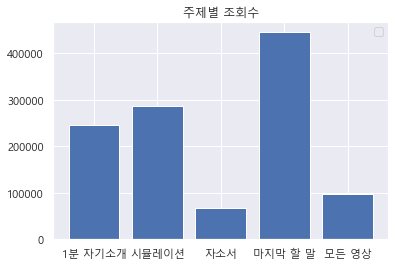

In [48]:
x = np.arange(5)
types = ['1분 자기소개', '시뮬레이션', '자소서', '마지막 할 말', '모든 영상']
values = [oneminute['view'].mean(),simulation['view'].mean(), jasoseo['view'].mean(), final_say['view'].mean(), except_shorts['view'].mean()]

plt.title('주제별 조회수')
plt.bar(x, values)
plt.xticks(x, types)
plt.legend()
plt.show()

**마지막 할 말이 유난히 높다**
- 조회수가 102만회로 유난히 높은 영상은 **회색 썸네일**

In [49]:
final_say = []
for i in range(len(except_shorts)):
    if '마지막' in except_shorts['title'][i]:
        final_say.append(except_shorts.iloc[i][['title','view', 'run_time']])
final_say = pd.DataFrame(final_say)
final_say

,title,view,run_time
108,[면접연구소] 면접에서 마지막 할 말,18717,185
153,면접관이 딱 정해주는 면접 마지막 할말,291929,219
404,"면접관이 밝히는, 마지막할말은... 아무말도 하지 말아줘! 나 힘들다고~",1025777,320


In [53]:
simulation = []
simulation_sum = 0
for i in range(len(except_shorts)):
    if '직접 보여주는' in except_shorts['title'][i]:
        simulation.append(except_shorts.iloc[i][['title','view', 'run_time']])
        simulation_sum += 1
simulation = pd.DataFrame(simulation)
simulation.sort_values('view', ascending = False)

,title,view,run_time
142,면접관이 직접 보여주는 우리회사 떨어지면 어디 갈 거예요? 면접답변,1302687,367
156,면접관이 직접 보여주는 합격하는 1분 자기소개,625391,425
139,면접관이 직접 보여주는 합격시킬 수밖에 없는 지원자,132462,490
112,[면접연구소] 직접 보여주는 1분 자기소개 핵심 요약,83383,189
149,면접관이 직접 보여주는 모의면접 몰아보기,52825,537
144,면접관이 직접 보여주는 면접에서의 솔직함 vs. 멍청함,44130,316
14,합격자가 직접 보여주는 합격자 스펙 공개 (합격률 0%에서 최종합격까지),32188,703
110,[면접연구소] 직접 보여주는 취준생의 흔한 실수,27932,166


---

---

## title 전처리

In [87]:
#한글 형태소 분석기인 konlpy사용 

from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용
from konlpy.tag import Komoran
import re

In [88]:
kkma = Kkma()
komoran = Komoran()

In [89]:
title_ls=[]
for i in range(len(hyung)):
    special = re.compile(r'[^ A-Za-z0-9가-힣+]')
    result = special.sub('', hyung['title'].iloc[i])     
    title_ls.append(result)
    
hyung['title'] = title_ls

In [90]:
noun = []
for i in range(len(hyung)):
    noun0 = komoran.nouns(hyung['title'].iloc[i])
    noun1=[]
    for j in range(len(noun0)):
        if len(noun0[j]) ==  1:
            continue
        noun1.append(noun0[j])
    noun.append(noun1)
hyung['token'] = noun
hyung

,title,run_time,date,view,token
0,상반기를 이렇게 준비하면 당연히 떨어집니다,"[7, 51]",20220217,26080,"[상반기, 준비]"
1,2월에 진짜 놓치면 안 되는 것,"[8, 36]",20220215,55310,[2월]
2,서류에서 매번 광탈하는 취준생 특징,"[1, 11, 5]",20220214,13909,"[서류, 특징]"
3,공백기 2년 스펙 부족 지원자에 대한 면접관의 속마음,"[9, 43]",20220213,32281,"[공백기, 스펙, 부족, 지원자, 면접관, 속마음]"
4,나도 모르게 취업이 안 되는 이유,"[7, 17]",20220209,16045,"[취업, 이유]"
...,...,...,...,...,...
410,진짜 잘 본 면접 면접 잘 본거 같아요 그 기준이 뭘까요,"[7, 37]",20181205,223441,"[면접, 면접, 기준]"
411,면접관이 원하는 두괄식 답변을 알려주마 말을 짧게 하는게 두괄식이 아니야,"[4, 36]",20181205,221963,"[면접관, 답변, 아니야]"
412,면접관이 밝히는 면접준비의 핵심 수비형면접을 벗어나라,"[6, 59]",20181205,97103,"[면접관, 면접, 준비, 핵심, 수비, 면접]"
413,면접 마인드셋 성공하는 면접은 시작이 다르다,"[2, 58]",20181205,41178,"[면접, 마인드, 성공, 면접, 시작]"


### 2-3) 단어별 조회 수

In [96]:
# 제목별 토큰, 조회수
token_view = pd.DataFrame({'token':[]})

for i in range(len(hyung)):
    insert_data = pd.DataFrame({'token':hyung['token'].iloc[i]})
    insert_data['view'] = hyung['view'].iloc[i]
    token_view = token_view.append(insert_data)

token_view.sort_values(by='view', ascending=False).head()

,token,view
2,소개,1727000.0
0,면접관,1727000.0
1,소개,1727000.0
1,면접,1324995.0
0,준비,1324995.0


In [106]:
# 조회수 int으로 형변환
token_view['view'] = token_view['view'].astype('int')

# 토큰으로 그룹화하고, 토큰 한 개당 조회수 합 구하기
view_sum = token_view.groupby('token')['view'].sum().reset_index()

# 해당 토큰이 나온 횟수 구하기
view_sum['count'] = token_view.groupby('token').count().reset_index()['view'].tolist()

view_count = []

for i in range(len(view_sum)):
    # 토큰의 총 조회수 / 토큰 개수 (토큰 하나당 조회수)
    a = view_sum['view'].iloc[i] / view_sum['count'].iloc[i]
    view_count.append(a)
    
view_sum['view_count'] = view_count

# 토큰 하나 당 조회수 출력
view_sum.sort_values(by='view_count',ascending = False)[:5]

,token,view,count,view_count
145,말도,1025777,1,1.025777e+06
463,포부,689925,1,6.899250e+05
143,마지막,1336423,3,4.454743e+05
227,소개,5887457,14,4.205326e+05
425,최고,811933,2,4.059665e+05


불용어 제거

In [129]:
stop_word = ['면접관', '가지', '회사', '준비', '지원자', '절대', '사람','유형', '마지막', '말도','회사','마음속','행동',
          '안보','퇴직','정해주','입사','원칙','지시','면접','합격','취업','이유']

for i in range(len(stop_word)):
    drop_index = view_sum[view_sum['token'] == stop_word[i]].index
    view_sum = view_sum.drop(drop_index)
        
view_sum.sort_values(by='count',ascending = False)[:10]

,token,view,count,view_count
354,자소,3109270,46,67592.826087
401,지원,3632566,32,113517.687500
35,경험,1851057,30,61701.900000
412,질문,4442831,29,153201.068966
169,방법,1768071,27,65484.111111
334,이직,1157681,22,52621.863636
101,답변,4486371,21,213636.714286
31,경력,2599931,21,123806.238095
452,특징,916279,19,48225.210526
122,동기,3172453,19,166971.210526


워드클라우드

In [119]:
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

In [123]:
wordcloud = WordCloud(font_path = 'NanumGothic',width = 800,height = 800)

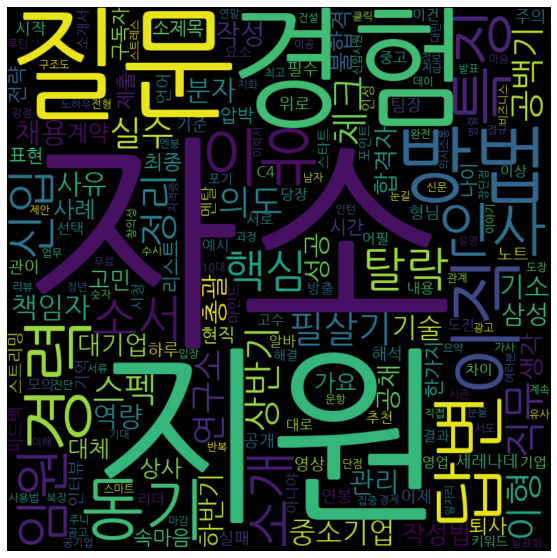

In [128]:
frequencies = view_sum.set_index('token').to_dict()['count']

keyword = wordcloud.generate_from_frequencies(frequencies)
array = keyword.to_array()

plt.figure(figsize=(10,10))
plt.imshow(array, interpolation='bilinear')
plt.axis('off')
plt.show()